# **Lesson 3b**
Baby Names

**Create Data** - We begin by creating our own data set for analysis. This prevents the end user reading this tutorial from having to download any files to replicate the results below. We will export this data set to a text file so that you can get some experience pulling data from a text file.  
**Get Data** - We will learn how to read in the text file containing the baby names. The data consist of baby names born in the year 1880.  
**Prepare Data** - Here we will simply take a look at the data and make sure it is clean. By clean I mean we will take a look inside the contents of the text file and look for any anomalities. These can include missing data, inconsistencies in the data, or any other data that seems out of place. If any are found we will then have to make decisions on what to do with these records.  
**Analyze Data** - We will simply find the most popular name in a specific year.  
**Present Data** - Through tabular data and a graph, clearly show the end user what is the most popular name in a specific year.  

***NOTE:  
Make sure you have looked through all previous lessons as the knowledge learned in previous lessons will be needed for this exercise.***  
    

In [18]:
# Import all libraries needed for the tutorial
import pandas as pd
import numpy as np
from numpy import sum
import matplotlib.pyplot as plt
import sys #only needed to determine Python version number

# Enable inline plotting
%matplotlib inline

#Retrieve Data  

The data set will consist of 1,000 baby names and the number of births recorded for that year (1880). We will also add plenty of duplicates so you will see the same baby name more than once. You can think of the multiple entries per name simply being different hospitals around the country reporting the number of births per baby name. So if two hospitals reported the baby name "Bob", the data will have two values for the name Bob. We will start by creating the random set of baby names. 

In [19]:

# when developing your example at first use a smaller data set then enlarge it 
# once things seem to be working. This will help iPython and Pandas to run faster.
# years = range(1880,2015)
years = range(2000,2015)

# Your location may vary...
Location = r'C:\Users\GBTC407001ur\Dropbox\dave45678\Python for Data Analytics\babynames\names\\'
# Location = 'babynames/names/'    #on Mac and Unix use single /,  on Windows use double \\

#create a python list called pieces 
pieces = []
columns = ['name','sex','births']
for year in years:
    path = Location + 'yob%d.txt' % year
    #print(path) #remove the # at the beginning of this line to display the path to the file
    
    # create a dataframe from each file and read each file into the dataframe
    # because each file contains the data for one year each frame is for the year of the file
    
    frame = pd.read_csv(path, names=columns)
    
    # add the year column and append all the dataframes to the pieces list
    frame['year'] = year
    pieces.append(frame)
    
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

# inspect your names DataFrame
names.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792389 entries, 0 to 1792388
Data columns (total 4 columns):
name      object
sex       object
births    int64
year      int64
dtypes: int64(2), object(2)
memory usage: 68.4+ MB


In [20]:
# note: this differs from the example in the book (p. 34) to work with py3
total_births = names.pivot_table('births', index=['year'], columns='sex', aggfunc=sum)


In [21]:
total_births.tail()

sex,F,M
year,,
2009,1832925,1979303
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414
2013,1745339,1881463


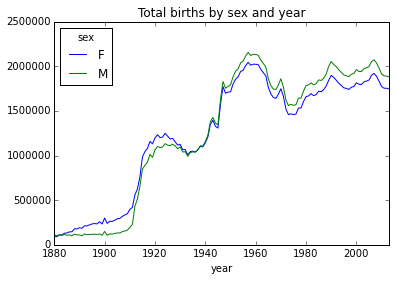

In [22]:
# see page 34 of the book
# create a column, prop, to hold the proportion of the babies given each name relative to the total births
total_births.plot(title='Total births by sex and year')

def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)
    
    group['prop'] = births/births.sum()
    return group

names = names.groupby(['year','sex']).apply(add_prop)



In [23]:
names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792389 entries, 0 to 1792388
Data columns (total 5 columns):
name      object
sex       object
births    int64
year      int64
prop      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 82.0+ MB


In [24]:
# p. 35 sanity check
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [25]:
# p. 35 extract a subset of the data to facilitate further analysis: 
# The top 100 names for each sex/year combination.

def get_top1000(group):
    return group.sort_index(by='births',ascending=False)[:100]

grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)

top1000


name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     796  1880  0.008748
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2013 M   1778447      Ayden   M    6054  2013  0.003218
         1778448      Kevin   M    5918  2013  0.003145
         1778449    Zachary   M    5726  2013  0.003043
         1778450     Parker   M    5651  2013  0.003004
         1778451      Blake   M    5629  2013  0.002992
         1778452       Jose   M    5612  2013  0.002983
         1778453    Grayson   M    5536  2013  0.002942
         1778454      Chase   M    5524  2013  0.002936
         1778455      Jason   M    5492  2013  0.002919
         1778456        Ian   M    5401  2013  0.002871
         1778457    Bentley   M    5360  2013  0.002849
         1778458       Adam   M    5227  2013  0.002778
         1778459     Xavier   M    4958  2013  0.002635
         1778460     Cooper   M    4872  2013  0.002589
         1778461     Justin   M    4849  2013  0.002577
         1778462      Nolan   M    4736  2013  0.002517
         1778463     Hudson   M    4653  2013  0.002473
         1778464     Easton   M    4636  2013  0.002464
         1778465       Jase   M    4545  2013  0.002416
         1778466     Carson   M    4521  2013  0.002403
         1778467  Nathaniel   M    4504  2013  0.002394
         1778468     Jaxson   M    4439  2013  0.002359
         1778469     Kayden   M    4411  2013  0.002344
         1778470      Brody   M    4319  2013  0.002296
         1778471    Lincoln   M    4024  2013  0.002139
         1778472    Tristan   M    3993  2013  0.002122
         1778473       Luis   M    3991  2013  0.002121
         1778474     Damian   M    3958  2013  0.002104
         1778475     Camden   M    3881  2013  0.002063
         1778476       Juan   M    3875  2013  0.002060

[26800 rows x 5 columns]

# Analyzing Naming Trends

In [26]:
# p. 36
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

# the book shows the following line which is for python 2.7x. Change it as below for python 3.x
# total_births = top1000.pivot_table('births', rows='year', cols='name', aggfunc=sum)
total_births = top1000.pivot_table('births', index=['year'], columns='name', aggfunc=sum)
total_births


name,Aaliyah,Aaron,Abigail,Ada,Adam,Addie,Addison,Adrian,Agnes,Aidan,...,Willis,Wilma,Woodrow,Wyatt,Xavier,Yolanda,Yvonne,Zachary,Zoe,Zoey
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,652,NaN,274,NaN,NaN,473,NaN,...,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,628,NaN,287,NaN,NaN,424,NaN,...,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,689,NaN,341,NaN,NaN,565,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,778,NaN,362,NaN,NaN,623,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,854,NaN,356,NaN,NaN,703,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1885,NaN,NaN,NaN,876,NaN,406,NaN,NaN,695,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1886,NaN,NaN,NaN,915,NaN,417,NaN,NaN,779,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1887,NaN,NaN,NaN,910,NaN,393,NaN,NaN,896,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1888,NaN,NaN,NaN,1116,NaN,455,NaN,NaN,1046,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012C2F7F0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000015F654E0>], dtype=object)

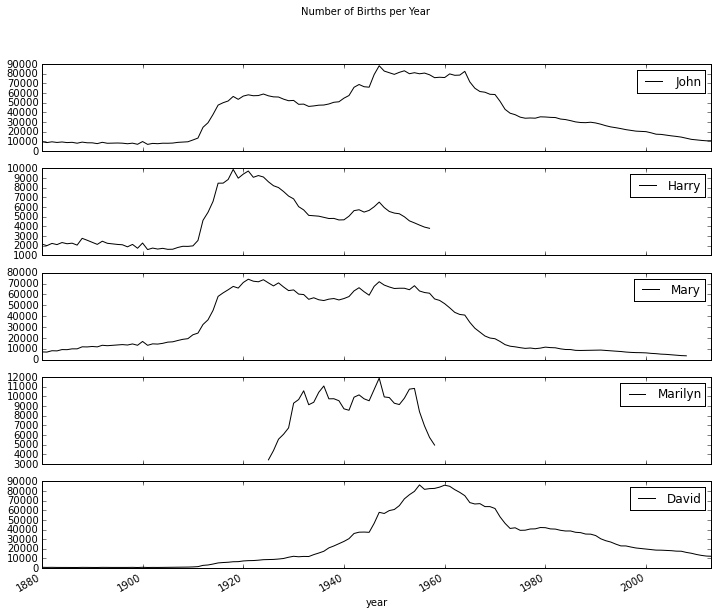

In [27]:
# p. 36 plot your name
subset = total_births[['John','Harry', 'Mary', 'Marilyn', 'David']]
subset.plot(subplots=True, figsize=(12,10), grid=False, title="Number of Births per Year")